# QubitX 🚀
## Interactive Qubit Visualization Tool

### 🎯 Core Topics Covered:
1. **Qubits** - Understanding quantum bits and their fundamental properties
2. **Representing Qubit States** - Mathematical and geometric representations
3. **Dirac Bra-Ket Notation** - The elegant mathematical framework for quantum mechanics
4. **Representing Qubit States** - Advanced techniques and practical applications

---

This comprehensive notebook provides an interactive introduction to quantum computing fundamentals through visualizations and hands-on exploration. You'll master:

- **Vector Representation**: How qubits are represented as complex vectors in Hilbert space
- **Dirac Notation**: Mathematical notation for quantum states (|ψ⟩, ⟨ψ|, ⟨φ|ψ⟩)
- **Probability Calculations**: Computing measurement outcomes and quantum interference
- **Bloch Sphere Visualization**: 3D geometric representation of qubit states
- **Quantum Gates**: How unitary operations transform qubit states
- **Multiple Representations**: Converting between different mathematical formulations

## 🎯 Learning Objectives

By the end of this notebook, you'll understand:
1. The fundamental difference between classical bits and quantum qubits
2. How to work with complex amplitudes, phases, and measurement probabilities
3. How to visualize quantum states on the Bloch sphere and interpret coordinates
4. How quantum gates affect qubit states through matrix operations
5. The power and elegance of Dirac bra-ket notation in quantum mechanics
6. Practical applications of different qubit representation methods

## 🌟 What Makes This Special

QubitX combines theoretical rigor with interactive exploration, making complex quantum concepts accessible through:
- **Real-time visualizations** that update as you explore
- **Multiple representation methods** for the same quantum phenomena  
- **Hands-on exercises** to reinforce understanding
- **Professional-grade mathematical formulations** used in quantum research

In [15]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Try to import Qiskit for advanced Bloch sphere visualization
try:
    from qiskit.visualization import plot_bloch_vector
    QISKIT_AVAILABLE = True
    print("✅ Qiskit available for enhanced Bloch sphere visualization")
except ImportError:
    QISKIT_AVAILABLE = False
    print("⚠️ Qiskit not available - using custom Bloch sphere visualization")

# Set up matplotlib for interactive plots
%matplotlib inline
# Try to use seaborn style, fallback to default if not available
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        pass  # Use default style

print("🚀 All libraries imported successfully!")

✅ Qiskit available for enhanced Bloch sphere visualization
🚀 All libraries imported successfully!


## 1. Classical Bits vs Qubits 🔄

### Classical Bits
- Can only be in state 0 or 1
- Deterministic: measuring always gives the same result
- No superposition

### Qubits (Quantum Bits)
- Can be in state |0⟩, |1⟩, or a **superposition** of both
- Probabilistic: measuring gives random results based on amplitudes
- Can exist in infinitely many states on the Bloch sphere

### Mathematical Representation
A qubit state is represented as: **|ψ⟩ = α|0⟩ + β|1⟩**

Where:
- α, β are complex numbers (amplitudes)
- |α|² + |β|² = 1 (normalization condition)
- |α|² = probability of measuring 0
- |β|² = probability of measuring 1

## 1.5. Multiple Ways to Represent Qubit States 🔄

Understanding qubits requires mastering different representation methods. Each offers unique insights:

### 1. **Linear Algebra (Vector) Representation**
- **Column Vector**: |ψ⟩ = [α, β]ᵀ where α, β ∈ ℂ
- **Basis vectors**: |0⟩ = [1, 0]ᵀ and |1⟩ = [0, 1]ᵀ
- **General state**: |ψ⟩ = α|0⟩ + β|1⟩ = α[1,0]ᵀ + β[0,1]ᵀ = [α,β]ᵀ

### 2. **Dirac Bra-Ket Notation**
- **Ket**: |ψ⟩ represents the quantum state (column vector)
- **Bra**: ⟨ψ| represents the complex conjugate transpose (row vector)
- **Braket**: ⟨φ|ψ⟩ represents inner product between states
- **Normalization**: ⟨ψ|ψ⟩ = |α|² + |β|² = 1

### 3. **Probability Amplitudes**
- α = amplitude for measuring |0⟩ → P(0) = |α|²
- β = amplitude for measuring |1⟩ → P(1) = |β|²
- **Physical meaning**: Amplitudes encode both probability and phase information

### 4. **Bloch Sphere Representation** 
- **Spherical coordinates**: Any qubit maps to a point on a unit sphere
- **Parametrization**: |ψ⟩ = cos(θ/2)|0⟩ + e^(iφ)sin(θ/2)|1⟩
- **Geometric interpretation**: θ ∈ [0,π], φ ∈ [0,2π]

### 5. **Matrix Representation (Density Matrix)**
- **Pure state**: ρ = |ψ⟩⟨ψ| = [α*, β*] ⊗ [α, β]
- **Useful for**: Mixed states, decoherence, and quantum operations

In [3]:
class QubitState:
    """
    A class to represent and manipulate qubit states with full quantum mechanics support.
    Implements all the representation methods discussed above.
    """
    
    def __init__(self, alpha=1.0, beta=0.0):
        """
        Initialize a qubit state |ψ⟩ = α|0⟩ + β|1⟩
        
        Args:
            alpha: Complex amplitude for |0⟩ state
            beta: Complex amplitude for |1⟩ state
        """
        self.alpha = complex(alpha)
        self.beta = complex(beta)
        self.normalize()
    
    def normalize(self):
        """Ensure the qubit state is normalized: |α|² + |β|² = 1"""
        norm = np.sqrt(abs(self.alpha)**2 + abs(self.beta)**2)
        if norm != 0:
            self.alpha /= norm
            self.beta /= norm
    
    @property
    def ket(self):
        """Return the ket vector |ψ⟩ as a column vector"""
        return np.array([[self.alpha], [self.beta]], dtype=complex)
    
    @property
    def bra(self):
        """Return the bra vector ⟨ψ| as a row vector (conjugate transpose)"""
        return np.array([[np.conj(self.alpha), np.conj(self.beta)]], dtype=complex)
    
    def probability_0(self):
        """Probability of measuring |0⟩"""
        return abs(self.alpha)**2
    
    def probability_1(self):
        """Probability of measuring |1⟩"""
        return abs(self.beta)**2
    
    def inner_product(self, other_state):
        """Calculate inner product ⟨ψ|φ⟩ with another qubit state"""
        return (self.bra @ other_state.ket)[0, 0]
    
    def to_bloch_coordinates(self):
        """Convert to Bloch sphere coordinates (x, y, z)"""
        # α = cos(θ/2), β = e^(iφ)sin(θ/2)
        # Extract θ and φ
        theta = 2 * np.arccos(abs(self.alpha))
        
        if abs(self.beta) > 1e-10:  # Avoid division by zero
            phi = np.angle(self.beta) - np.angle(self.alpha)
        else:
            phi = 0
        
        # Convert to Cartesian coordinates
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        
        return x, y, z, theta, phi
    
    def __str__(self):
        """String representation in Dirac notation"""
        def format_complex(c):
            if abs(c.imag) < 1e-10:  # Essentially real
                return f"{c.real:.3f}"
            elif abs(c.real) < 1e-10:  # Essentially imaginary
                if c.imag == 1:
                    return "i"
                elif c.imag == -1:
                    return "-i"
                else:
                    return f"{c.imag:.3f}i"
            else:  # Complex
                sign = "+" if c.imag >= 0 else "-"
                return f"{c.real:.3f}{sign}{abs(c.imag):.3f}i"
        
        alpha_str = format_complex(self.alpha)
        beta_str = format_complex(self.beta)
        
        if abs(self.alpha) < 1e-10:  # α ≈ 0
            return f"|ψ⟩ = {beta_str}|1⟩"
        elif abs(self.beta) < 1e-10:  # β ≈ 0
            return f"|ψ⟩ = {alpha_str}|0⟩"
        else:
            sign = "+" if self.beta.real >= 0 or (self.beta.real == 0 and self.beta.imag >= 0) else ""
            return f"|ψ⟩ = {alpha_str}|0⟩ {sign}{beta_str}|1⟩"

# Define standard basis states for reference
state_0 = QubitState(1, 0)  # |0⟩
state_1 = QubitState(0, 1)  # |1⟩
state_plus = QubitState(1/np.sqrt(2), 1/np.sqrt(2))  # |+⟩ = (|0⟩ + |1⟩)/√2
state_minus = QubitState(1/np.sqrt(2), -1/np.sqrt(2))  # |-⟩ = (|0⟩ - |1⟩)/√2

print("🎯 QubitState class created successfully!")
print(f"Standard basis states defined:")
print(f"  {state_0}")
print(f"  {state_1}")
print(f"  {state_plus}")
print(f"  {state_minus}")

🎯 QubitState class created successfully!
Standard basis states defined:
  |ψ⟩ = 1.000|0⟩
  |ψ⟩ = 1.000|1⟩
  |ψ⟩ = 0.707|0⟩ +0.707|1⟩
  |ψ⟩ = 0.707|0⟩ -0.707|1⟩


In [4]:
# Demonstration: All Representations of the Same Qubit State
print("🎯 COMPREHENSIVE QUBIT REPRESENTATION DEMO")
print("="*60)

# Create an example qubit state
alpha = 0.6 + 0.8j  # Complex amplitude for |0⟩
beta = 0.0 + 0.0j   # Amplitude for |1⟩ (will be calculated to normalize)

# Let's create a more interesting state
theta = np.pi/3  # 60 degrees
phi = np.pi/4    # 45 degrees

# From spherical coordinates to amplitudes
alpha = np.cos(theta/2)
beta = np.exp(1j * phi) * np.sin(theta/2)

state = QubitState(alpha, beta)

print(f"📋 EXAMPLE STATE ANALYSIS:")
print(f"   θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)")
print(f"   φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)")
print()

# 1. Vector Representation
print("1️⃣ VECTOR REPRESENTATION:")
print(f"   Column vector |ψ⟩ = {state.ket.flatten()}")
print(f"   α (amplitude for |0⟩) = {state.alpha:.4f}")
print(f"   β (amplitude for |1⟩) = {state.beta:.4f}")
print()

# 2. Dirac Notation
print("2️⃣ DIRAC BRA-KET NOTATION:")
print(f"   Ket: |ψ⟩ = {state}")
print(f"   Bra: ⟨ψ| = {state.bra}")
print(f"   Normalization check: ⟨ψ|ψ⟩ = {state.inner_product(state):.6f}")
print()

# 3. Probability Amplitudes
print("3️⃣ PROBABILITY AMPLITUDES:")
print(f"   |α|² = P(measuring |0⟩) = {state.probability_0():.4f}")
print(f"   |β|² = P(measuring |1⟩) = {state.probability_1():.4f}")
print(f"   Total probability = {state.probability_0() + state.probability_1():.6f}")
print()

# 4. Bloch Sphere Coordinates
print("4️⃣ BLOCH SPHERE REPRESENTATION:")
x, y, z, theta_calc, phi_calc = state.to_bloch_coordinates()
print(f"   Cartesian: (x, y, z) = ({x:.4f}, {y:.4f}, {z:.4f})")
print(f"   Spherical: θ = {theta_calc:.4f}, φ = {phi_calc:.4f}")
print(f"   Verification: θ input = {theta:.4f}, φ input = {phi:.4f}")
print()

# 5. Matrix (Density Matrix) Representation
print("5️⃣ DENSITY MATRIX REPRESENTATION:")
rho = np.outer(state.ket, np.conj(state.ket))  # ρ = |ψ⟩⟨ψ|
print(f"   ρ = |ψ⟩⟨ψ| = ")
print(f"   {rho}")
print(f"   Trace(ρ) = {np.trace(rho):.6f} (should be 1)")
print()

print("✨ All representations describe the same quantum state!")

🎯 COMPREHENSIVE QUBIT REPRESENTATION DEMO
📋 EXAMPLE STATE ANALYSIS:
   θ = 1.047 rad (60.0°)
   φ = 0.785 rad (45.0°)

1️⃣ VECTOR REPRESENTATION:
   Column vector |ψ⟩ = [0.8660254 +0.j         0.35355339+0.35355339j]
   α (amplitude for |0⟩) = 0.8660+0.0000j
   β (amplitude for |1⟩) = 0.3536+0.3536j

2️⃣ DIRAC BRA-KET NOTATION:
   Ket: |ψ⟩ = |ψ⟩ = 0.866|0⟩ +0.354+0.354i|1⟩
   Bra: ⟨ψ| = [[0.8660254 -0.j         0.35355339-0.35355339j]]
   Normalization check: ⟨ψ|ψ⟩ = 1.000000+0.000000j

3️⃣ PROBABILITY AMPLITUDES:
   |α|² = P(measuring |0⟩) = 0.7500
   |β|² = P(measuring |1⟩) = 0.2500
   Total probability = 1.000000

4️⃣ BLOCH SPHERE REPRESENTATION:
   Cartesian: (x, y, z) = (0.6124, 0.6124, 0.5000)
   Spherical: θ = 1.0472, φ = 0.7854
   Verification: θ input = 1.0472, φ input = 0.7854

5️⃣ DENSITY MATRIX REPRESENTATION:
   ρ = |ψ⟩⟨ψ| = 
   [[0.75      +0.00000000e+00j 0.30618622-3.06186218e-01j]
 [0.30618622+3.06186218e-01j 0.25      +1.55582133e-19j]]
   Trace(ρ) = 1.000000+0.000000

In [5]:
class QuantumGates:
    """
    Implementation of common quantum gates as matrix operations.
    """
    
    @staticmethod
    def pauli_x():
        """Pauli-X gate (NOT gate) - flips |0⟩ ↔ |1⟩"""
        return np.array([[0, 1], [1, 0]], dtype=complex)
    
    @staticmethod
    def pauli_y():
        """Pauli-Y gate"""
        return np.array([[0, -1j], [1j, 0]], dtype=complex)
    
    @staticmethod
    def pauli_z():
        """Pauli-Z gate - adds phase to |1⟩"""
        return np.array([[1, 0], [0, -1]], dtype=complex)
    
    @staticmethod
    def hadamard():
        """Hadamard gate - creates superposition"""
        return np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)
    
    @staticmethod
    def phase(phi):
        """Phase gate - adds phase φ to |1⟩"""
        return np.array([[1, 0], [0, np.exp(1j * phi)]], dtype=complex)
    
    @staticmethod
    def rotation_x(theta):
        """Rotation around X-axis by angle θ"""
        cos_half = np.cos(theta / 2)
        sin_half = np.sin(theta / 2)
        return np.array([[cos_half, -1j * sin_half], 
                        [-1j * sin_half, cos_half]], dtype=complex)
    
    @staticmethod
    def rotation_y(theta):
        """Rotation around Y-axis by angle θ"""
        cos_half = np.cos(theta / 2)
        sin_half = np.sin(theta / 2)
        return np.array([[cos_half, -sin_half], 
                        [sin_half, cos_half]], dtype=complex)
    
    @staticmethod
    def rotation_z(theta):
        """Rotation around Z-axis by angle θ"""
        return np.array([[np.exp(-1j * theta / 2), 0], 
                        [0, np.exp(1j * theta / 2)]], dtype=complex)
    
    @staticmethod
    def apply_gate(gate_matrix, qubit_state):
        """Apply a quantum gate to a qubit state"""
        new_ket = gate_matrix @ qubit_state.ket
        return QubitState(new_ket[0, 0], new_ket[1, 0])

# Create gate instances
gates = QuantumGates()

print("🚪 Quantum gates implemented!")
print("Available gates: X, Y, Z, H, Phase, Rx, Ry, Rz")

🚪 Quantum gates implemented!
Available gates: X, Y, Z, H, Phase, Rx, Ry, Rz


In [6]:
class QubitVisualizer:
    """
    Visualization tools for qubit states and quantum operations.
    """
    
    @staticmethod
    def plot_probabilities(qubit_state, title="Measurement Probabilities"):
        """Plot measurement probabilities as a bar chart"""
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        
        probs = [qubit_state.probability_0(), qubit_state.probability_1()]
        labels = ['P(|0⟩)', 'P(|1⟩)']
        colors = ['lightblue', 'lightcoral']
        
        bars = ax.bar(labels, probs, color=colors, alpha=0.7, edgecolor='black')
        
        # Add probability values on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{probs[i]:.3f}', ha='center', va='bottom', fontsize=12)
        
        ax.set_ylim(0, 1.1)
        ax.set_ylabel('Probability', fontsize=12)
        ax.set_title(f'{title}\n{qubit_state}', fontsize=14)
        ax.grid(True, alpha=0.3)
        
        # Add normalization check
        total_prob = sum(probs)
        ax.text(0.5, 0.95, f'Total: {total_prob:.3f}', 
                transform=ax.transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        
        plt.tight_layout()
        return fig, ax
    
    @staticmethod
    def plot_bloch_sphere_custom(qubit_state, title="Qubit State on Bloch Sphere"):
        """Create a custom 3D Bloch sphere visualization"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Create sphere
        u = np.linspace(0, 2 * np.pi, 50)
        v = np.linspace(0, np.pi, 50)
        x_sphere = np.outer(np.cos(u), np.sin(v))
        y_sphere = np.outer(np.sin(u), np.sin(v))
        z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
        
        # Plot transparent sphere
        ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='gray')
        
        # Add coordinate axes
        ax.plot([-1.2, 1.2], [0, 0], [0, 0], 'k-', alpha=0.3)
        ax.plot([0, 0], [-1.2, 1.2], [0, 0], 'k-', alpha=0.3)
        ax.plot([0, 0], [0, 0], [-1.2, 1.2], 'k-', alpha=0.3)
        
        # Add labels
        ax.text(1.3, 0, 0, 'X', fontsize=12)
        ax.text(0, 1.3, 0, 'Y', fontsize=12)
        ax.text(0, 0, 1.3, 'Z', fontsize=12)
        ax.text(0, 0, 1.1, '|0⟩', fontsize=12, ha='center')
        ax.text(0, 0, -1.1, '|1⟩', fontsize=12, ha='center')
        ax.text(1.1, 0, 0, '|+⟩', fontsize=12, ha='center')
        ax.text(-1.1, 0, 0, '|-⟩', fontsize=12, ha='center')
        
        # Get Bloch coordinates
        x, y, z, theta, phi = qubit_state.to_bloch_coordinates()
        
        # Plot state vector
        ax.quiver(0, 0, 0, x, y, z, color='red', arrow_length_ratio=0.1, linewidth=3)
        ax.scatter([x], [y], [z], color='red', s=100)
        
        # Add longitude and latitude circles
        theta_circle = np.linspace(0, 2*np.pi, 100)
        ax.plot(np.cos(theta_circle), np.sin(theta_circle), 0, 'b--', alpha=0.5)
        ax.plot(np.cos(theta_circle), 0, np.sin(theta_circle), 'g--', alpha=0.5)
        ax.plot(0, np.cos(theta_circle), np.sin(theta_circle), 'r--', alpha=0.5)
        
        ax.set_xlim([-1.2, 1.2])
        ax.set_ylim([-1.2, 1.2])
        ax.set_zlim([-1.2, 1.2])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'{title}\n{qubit_state}\nθ={theta:.3f}, φ={phi:.3f}')
        
        return fig, ax
    
    @staticmethod
    def plot_bloch_sphere_qiskit(qubit_state, title="Qubit State on Bloch Sphere"):
        """Use Qiskit's Bloch sphere if available"""
        if not QISKIT_AVAILABLE:
            return QubitVisualizer.plot_bloch_sphere_custom(qubit_state, title)
        
        x, y, z, theta, phi = qubit_state.to_bloch_coordinates()
        fig = plot_bloch_vector([x, y, z], title=f'{title}\n{qubit_state}')
        return fig, None
    
    @staticmethod
    def create_interactive_widget():
        """Create interactive sliders for exploring qubit states"""
        # Create sliders
        theta_slider = widgets.FloatSlider(
            value=0, min=0, max=np.pi, step=0.01,
            description='θ (polar):', style={'description_width': 'initial'},
            continuous_update=True
        )
        
        phi_slider = widgets.FloatSlider(
            value=0, min=0, max=2*np.pi, step=0.01,
            description='φ (azimuthal):', style={'description_width': 'initial'},
            continuous_update=True
        )
        
        gate_dropdown = widgets.Dropdown(
            options=['None', 'X', 'Y', 'Z', 'H', 'S', 'T'],
            value='None',
            description='Apply Gate:',
            style={'description_width': 'initial'}
        )
        
        output = widgets.Output()
        
        def update_visualization(theta, phi, gate):
            with output:
                clear_output(wait=True)
                
                # Create initial state from spherical coordinates
                alpha = np.cos(theta / 2)
                beta = np.exp(1j * phi) * np.sin(theta / 2)
                state = QubitState(alpha, beta)
                
                # Apply gate if selected
                if gate == 'X':
                    state = gates.apply_gate(gates.pauli_x(), state)
                elif gate == 'Y':
                    state = gates.apply_gate(gates.pauli_y(), state)
                elif gate == 'Z':
                    state = gates.apply_gate(gates.pauli_z(), state)
                elif gate == 'H':
                    state = gates.apply_gate(gates.hadamard(), state)
                elif gate == 'S':
                    state = gates.apply_gate(gates.phase(np.pi/2), state)
                elif gate == 'T':
                    state = gates.apply_gate(gates.phase(np.pi/4), state)
                
                # Create side-by-side plots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
                
                # Probability plot
                probs = [state.probability_0(), state.probability_1()]
                labels = ['P(|0⟩)', 'P(|1⟩)']
                colors = ['lightblue', 'lightcoral']
                
                bars = ax1.bar(labels, probs, color=colors, alpha=0.7, edgecolor='black')
                for i, bar in enumerate(bars):
                    height = bar.get_height()
                    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{probs[i]:.3f}', ha='center', va='bottom', fontsize=12)
                
                ax1.set_ylim(0, 1.1)
                ax1.set_ylabel('Probability')
                ax1.set_title(f'Measurement Probabilities\n{state}')
                ax1.grid(True, alpha=0.3)
                
                # Bloch sphere plot (simplified 2D projection)
                x, y, z, theta_coord, phi_coord = state.to_bloch_coordinates()
                
                # Create circle
                circle_theta = np.linspace(0, 2*np.pi, 100)
                ax2.plot(np.cos(circle_theta), np.sin(circle_theta), 'k-', alpha=0.3)
                
                # Plot state
                ax2.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, 
                          color='red', width=0.005)
                ax2.scatter([x], [y], color='red', s=100, zorder=5)
                
                # Add labels
                ax2.text(0, 1.1, '|0⟩ (Z+)', ha='center', fontsize=10)
                ax2.text(0, -1.1, '|1⟩ (Z-)', ha='center', fontsize=10)
                ax2.text(1.1, 0, '|+⟩ (X+)', ha='center', fontsize=10)
                ax2.text(-1.1, 0, '|-⟩ (X-)', ha='center', fontsize=10)
                
                ax2.set_xlim(-1.3, 1.3)
                ax2.set_ylim(-1.3, 1.3)
                ax2.set_aspect('equal')
                ax2.grid(True, alpha=0.3)
                ax2.set_title(f'Bloch Sphere (X-Y projection)\nθ={theta_coord:.3f}, φ={phi_coord:.3f}')
                
                plt.tight_layout()
                plt.show()
        
        # Create interactive widget
        interactive_widget = widgets.interactive(
            update_visualization,
            theta=theta_slider,
            phi=phi_slider,
            gate=gate_dropdown
        )
        
        return widgets.VBox([
            widgets.HTML("<h3>🎮 Interactive Qubit Explorer</h3>"),
            widgets.HTML("<p>Adjust θ and φ to explore different qubit states, then apply quantum gates!</p>"),
            interactive_widget,
            output
        ])

visualizer = QubitVisualizer()
print("📊 Visualization tools ready!")

📊 Visualization tools ready!


## 2. Demonstration: Working with Qubit States 🧪

Let's explore different qubit states and see how they appear on the Bloch sphere!

In [7]:
# Example 1: Basic computational basis states
print("🔵 Basic Computational Basis States:")
print("="*50)

states = {
    "|0⟩": QubitState(1, 0),
    "|1⟩": QubitState(0, 1),
    "|+⟩": QubitState(1/np.sqrt(2), 1/np.sqrt(2)),
    "|-⟩": QubitState(1/np.sqrt(2), -1/np.sqrt(2)),
    "|i⟩": QubitState(1/np.sqrt(2), 1j/np.sqrt(2)),
    "|-i⟩": QubitState(1/np.sqrt(2), -1j/np.sqrt(2))
}

for name, state in states.items():
    x, y, z, theta, phi = state.to_bloch_coordinates()
    print(f"{name:4s}: {state}")
    print(f"      Probabilities: P(0)={state.probability_0():.3f}, P(1)={state.probability_1():.3f}")
    print(f"      Bloch coords: ({x:.3f}, {y:.3f}, {z:.3f})")
    print(f"      Spherical: θ={theta:.3f}, φ={phi:.3f}")
    print()

🔵 Basic Computational Basis States:
|0⟩ : |ψ⟩ = 1.000|0⟩
      Probabilities: P(0)=1.000, P(1)=0.000
      Bloch coords: (0.000, 0.000, 1.000)
      Spherical: θ=0.000, φ=0.000

|1⟩ : |ψ⟩ = 1.000|1⟩
      Probabilities: P(0)=0.000, P(1)=1.000
      Bloch coords: (0.000, 0.000, -1.000)
      Spherical: θ=3.142, φ=0.000

|+⟩ : |ψ⟩ = 0.707|0⟩ +0.707|1⟩
      Probabilities: P(0)=0.500, P(1)=0.500
      Bloch coords: (1.000, 0.000, 0.000)
      Spherical: θ=1.571, φ=0.000

|-⟩ : |ψ⟩ = 0.707|0⟩ -0.707|1⟩
      Probabilities: P(0)=0.500, P(1)=0.500
      Bloch coords: (-1.000, 0.000, 0.000)
      Spherical: θ=1.571, φ=3.142

|i⟩ : |ψ⟩ = 0.707|0⟩ +0.707i|1⟩
      Probabilities: P(0)=0.500, P(1)=0.500
      Bloch coords: (0.000, 1.000, 0.000)
      Spherical: θ=1.571, φ=1.571

|-i⟩: |ψ⟩ = 0.707|0⟩ +-0.707i|1⟩
      Probabilities: P(0)=0.500, P(1)=0.500
      Bloch coords: (0.000, -1.000, 0.000)
      Spherical: θ=1.571, φ=-1.571



In [22]:
# Comprehensive Analysis: All Common Quantum States
print("🌟 COMPREHENSIVE QUANTUM STATES ANALYSIS")
print("="*70)

# Define all common quantum states with detailed information
common_states = {
    '|0⟩ (Ground State)': {
        'state': QubitState(1, 0),
        'description': 'Computational basis state - qubit definitely in ground state',
        'angles': (0, 0),
        'classical_analog': 'Classical bit = 0'
    },
    '|1⟩ (Excited State)': {
        'state': QubitState(0, 1),
        'description': 'Computational basis state - qubit definitely in excited state',
        'angles': (np.pi, 0),
        'classical_analog': 'Classical bit = 1'
    },
    '|+⟩ (Plus State)': {
        'state': QubitState(1/np.sqrt(2), 1/np.sqrt(2)),
        'description': 'Equal superposition with positive phase - Hadamard applied to |0⟩',
        'angles': (np.pi/2, 0),
        'classical_analog': 'No classical equivalent - pure quantum state'
    },
    '|-⟩ (Minus State)': {
        'state': QubitState(1/np.sqrt(2), -1/np.sqrt(2)),
        'description': 'Equal superposition with negative phase - X then H applied to |0⟩',
        'angles': (np.pi/2, np.pi),
        'classical_analog': 'No classical equivalent - pure quantum state'
    },
    '|i+⟩ (Y+ State)': {
        'state': QubitState(1/np.sqrt(2), 1j/np.sqrt(2)),
        'description': 'Equal superposition with +i phase - Y-axis positive eigenstate',
        'angles': (np.pi/2, np.pi/2),
        'classical_analog': 'No classical equivalent - complex phase'
    },
    '|i-⟩ (Y- State)': {
        'state': QubitState(1/np.sqrt(2), -1j/np.sqrt(2)),
        'description': 'Equal superposition with -i phase - Y-axis negative eigenstate',
        'angles': (np.pi/2, 3*np.pi/2),
        'classical_analog': 'No classical equivalent - complex phase'
    }
}

# Create comprehensive analysis table
print("📊 COMPLETE STATE ANALYSIS TABLE")
print("-" * 130)
print(f"{'State':12} {'Dirac Notation':25} {'P(|0⟩)':8} {'P(|1⟩)':8} {'Bloch (X,Y,Z)':20} {'θ (rad)':10} {'φ (rad)':10} {'Phase Info':15}")
print("-" * 130)

state_data = {}
for name, info in common_states.items():
    state = info['state']
    p0 = state.probability_0()
    p1 = state.probability_1()
    x, y, z, theta, phi = state.to_bloch_coordinates()
    
    # Extract phase information
    alpha_phase = np.angle(state.alpha)
    beta_phase = np.angle(state.beta)
    relative_phase = beta_phase - alpha_phase
    
    state_data[name] = {
        'probabilities': (p0, p1),
        'bloch_coords': (x, y, z),
        'angles': (theta, phi),
        'phases': (alpha_phase, beta_phase, relative_phase)
    }
    
    print(f"{name[:12]:12} {str(state)[:25]:25} {p0:8.3f} {p1:8.3f} ({x:5.2f},{y:5.2f},{z:5.2f}) {theta:10.3f} {phi:10.3f} {relative_phase:15.3f}")

print("-" * 130)
print()

# Detailed Analysis for Each State
print("🔬 DETAILED INDIVIDUAL STATE ANALYSIS")
print("=" * 70)

for name, info in common_states.items():
    state = info['state']
    data = state_data[name]
    
    print(f"\n🎯 {name}")
    print(f"   Description: {info['description']}")
    print(f"   Mathematical Form: {state}")
    print(f"   Amplitudes: α = {state.alpha:.4f}, β = {state.beta:.4f}")
    print(f"   Magnitudes: |α| = {abs(state.alpha):.4f}, |β| = {abs(state.beta):.4f}")
    print(f"   Measurement Probabilities:")
    print(f"      P(measuring |0⟩) = |α|² = {data['probabilities'][0]:.4f} ({data['probabilities'][0]*100:.1f}%)")
    print(f"      P(measuring |1⟩) = |β|² = {data['probabilities'][1]:.4f} ({data['probabilities'][1]*100:.1f}%)")
    print(f"      Total probability = {sum(data['probabilities']):.4f}")
    print(f"   Bloch Sphere Representation:")
    print(f"      Cartesian coordinates: (X={data['bloch_coords'][0]:.4f}, Y={data['bloch_coords'][1]:.4f}, Z={data['bloch_coords'][2]:.4f})")
    print(f"      Spherical coordinates: θ={data['angles'][0]:.4f} rad ({np.degrees(data['angles'][0]):.1f}°), φ={data['angles'][1]:.4f} rad ({np.degrees(data['angles'][1]):.1f}°)")
    print(f"   Phase Information:")
    print(f"      arg(α) = {data['phases'][0]:.4f} rad, arg(β) = {data['phases'][1]:.4f} rad")
    print(f"      Relative phase = {data['phases'][2]:.4f} rad ({np.degrees(data['phases'][2]):.1f}°)")
    print(f"   Classical Analog: {info['classical_analog']}")

print()
print("✨ KEY INSIGHTS:")
print("   • |0⟩ and |1⟩ are at opposite poles of the Bloch sphere (Z = ±1)")
print("   • |+⟩ and |-⟩ have equal measurement probabilities but different phases")
print("   • |i+⟩ and |i-⟩ demonstrate complex phases with no classical equivalent")
print("   • All superposition states (|+⟩, |-⟩, |i+⟩, |i-⟩) lie on the equator of the Bloch sphere")
print("   • Phase differences determine the position on the Bloch sphere's equator")

🌟 COMPREHENSIVE QUANTUM STATES ANALYSIS
📊 COMPLETE STATE ANALYSIS TABLE
----------------------------------------------------------------------------------------------------------------------------------
State        Dirac Notation            P(|0⟩)   P(|1⟩)   Bloch (X,Y,Z)        θ (rad)    φ (rad)    Phase Info     
----------------------------------------------------------------------------------------------------------------------------------
|0⟩ (Ground  |ψ⟩ = 1.000|0⟩               1.000    0.000 ( 0.00, 0.00, 1.00)      0.000      0.000           0.000
|1⟩ (Excited |ψ⟩ = 1.000|1⟩               0.000    1.000 ( 0.00, 0.00,-1.00)      3.142      0.000           0.000
|+⟩ (Plus St |ψ⟩ = 0.707|0⟩ +0.707|1⟩     0.500    0.500 ( 1.00, 0.00, 0.00)      1.571      0.000           0.000
|-⟩ (Minus S |ψ⟩ = 0.707|0⟩ -0.707|1⟩     0.500    0.500 (-1.00, 0.00, 0.00)      1.571      3.142           3.142
|i+⟩ (Y+ Sta |ψ⟩ = 0.707|0⟩ +0.707i|1⟩    0.500    0.500 ( 0.00, 1.00, 0.00)      1.571   

🎨 COMPREHENSIVE VISUALIZATION OF ALL COMMON QUANTUM STATES


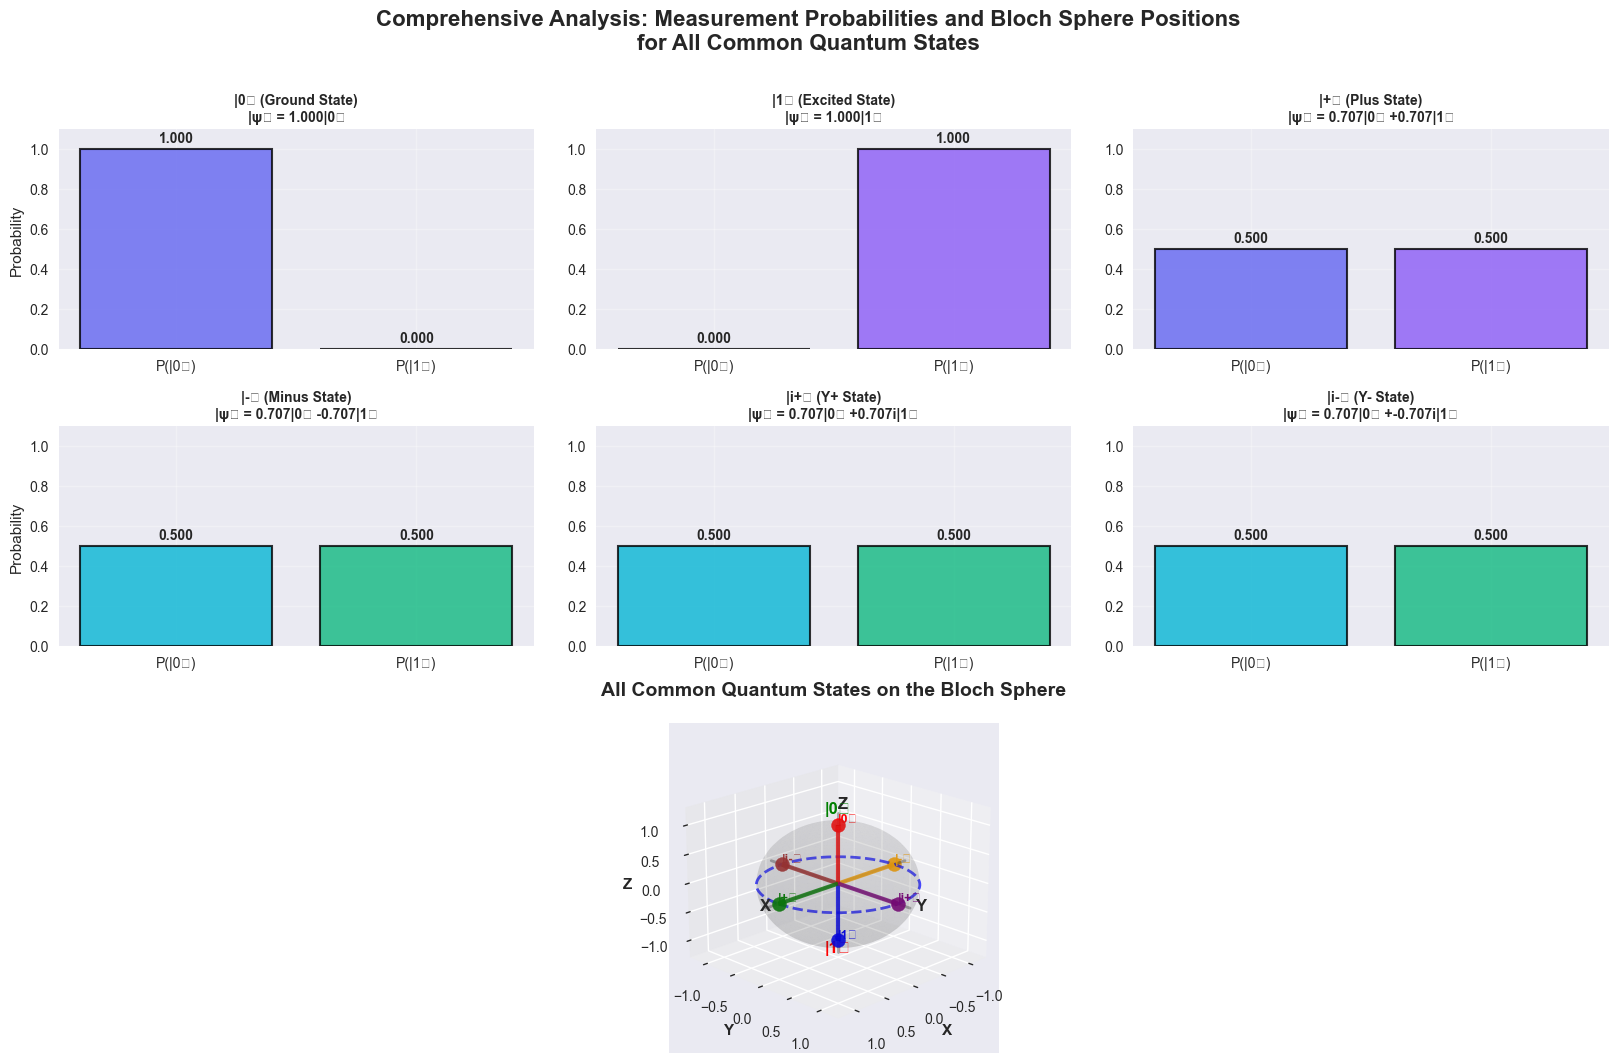


📋 SUMMARY TABLE: Bloch Sphere Coordinates
--------------------------------------------------------------------------------
State           X-coord    Y-coord    Z-coord    Equator?   Pole?   
--------------------------------------------------------------------------------
|0⟩                  0.000      0.000      1.000 No         Yes     
|1⟩                  0.000      0.000     -1.000 No         Yes     
|+⟩                  1.000      0.000      0.000 Yes        No      
|-⟩                 -1.000      0.000      0.000 Yes        No      
|i+⟩                 0.000      1.000      0.000 Yes        No      
|i-⟩                 0.000     -1.000      0.000 Yes        No      
--------------------------------------------------------------------------------

🔍 KEY OBSERVATIONS:
   • States |0⟩ and |1⟩ are at opposite poles (Z = ±1)
   • All superposition states lie on the equator (Z = 0)
   • |+⟩ and |-⟩ are on the X-axis with opposite signs
   • |i+⟩ and |i-⟩ are on the Y-axis with o

In [23]:
# Comprehensive Visualization: All Common States
print("🎨 COMPREHENSIVE VISUALIZATION OF ALL COMMON QUANTUM STATES")
print("=" * 70)

# Create a comprehensive visualization showing all states
fig = plt.figure(figsize=(20, 12))

# Define grid layout: 2 rows, 6 columns for individual states
# Plus 1 row for Bloch sphere comparison
gs = fig.add_gridspec(3, 6, height_ratios=[1, 1, 1.5], hspace=0.3, wspace=0.3)

states_list = list(common_states.items())

# Row 1: Probability charts for first 3 states
for i, (name, info) in enumerate(states_list[:3]):
    ax = fig.add_subplot(gs[0, i*2:(i*2)+2])
    state = info['state']
    p0, p1 = state.probability_0(), state.probability_1()
    
    bars = ax.bar(['P(|0⟩)', 'P(|1⟩)'], [p0, p1], 
                  color=['#6366f1', '#8b5cf6'], alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add probability values on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'{[p0, p1][j]:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_ylim(0, 1.1)
    ax.set_title(f'{name}\n{state}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Probability' if i == 0 else '')
    ax.grid(True, alpha=0.3)

# Row 2: Probability charts for last 3 states
for i, (name, info) in enumerate(states_list[3:]):
    ax = fig.add_subplot(gs[1, i*2:(i*2)+2])
    state = info['state']
    p0, p1 = state.probability_0(), state.probability_1()
    
    bars = ax.bar(['P(|0⟩)', 'P(|1⟩)'], [p0, p1], 
                  color=['#06b6d4', '#10b981'], alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add probability values on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'{[p0, p1][j]:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_ylim(0, 1.1)
    ax.set_title(f'{name}\n{state}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Probability' if i == 0 else '')
    ax.grid(True, alpha=0.3)

# Row 3: Combined Bloch sphere showing all states
ax_bloch = fig.add_subplot(gs[2, :], projection='3d')

# Create sphere surface
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot transparent sphere
ax_bloch.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='gray')

# Add coordinate axes
ax_bloch.plot([-1.2, 1.2], [0, 0], [0, 0], 'k-', alpha=0.3, linewidth=2)
ax_bloch.plot([0, 0], [-1.2, 1.2], [0, 0], 'k-', alpha=0.3, linewidth=2)
ax_bloch.plot([0, 0], [0, 0], [-1.2, 1.2], 'k-', alpha=0.3, linewidth=2)

# Add axis labels
ax_bloch.text(1.3, 0, 0, 'X', fontsize=12, fontweight='bold')
ax_bloch.text(0, 1.3, 0, 'Y', fontsize=12, fontweight='bold')
ax_bloch.text(0, 0, 1.3, 'Z', fontsize=12, fontweight='bold')

# Add state labels at poles and equator
ax_bloch.text(0, 0, 1.2, '|0⟩', fontsize=12, ha='center', color='green', fontweight='bold')
ax_bloch.text(0, 0, -1.2, '|1⟩', fontsize=12, ha='center', color='red', fontweight='bold')

# Plot all states on Bloch sphere
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
state_positions = []

for i, (name, info) in enumerate(common_states.items()):
    state = info['state']
    x, y, z, theta, phi = state.to_bloch_coordinates()
    state_positions.append((x, y, z))
    
    # Plot state vector
    ax_bloch.quiver(0, 0, 0, x, y, z, color=colors[i], arrow_length_ratio=0.1, linewidth=3, alpha=0.8)
    ax_bloch.scatter([x], [y], [z], color=colors[i], s=100, alpha=0.9)
    
    # Add state label
    offset = 0.15
    ax_bloch.text(x + offset, y + offset, z + offset, name.split()[0], 
                 fontsize=9, color=colors[i], fontweight='bold')

# Add equatorial circle
theta_circle = np.linspace(0, 2*np.pi, 100)
ax_bloch.plot(np.cos(theta_circle), np.sin(theta_circle), 0, 'b--', alpha=0.7, linewidth=2)

ax_bloch.set_xlim([-1.3, 1.3])
ax_bloch.set_ylim([-1.3, 1.3])
ax_bloch.set_zlim([-1.3, 1.3])
ax_bloch.set_xlabel('X', fontweight='bold')
ax_bloch.set_ylabel('Y', fontweight='bold')
ax_bloch.set_zlabel('Z', fontweight='bold')
ax_bloch.set_title('All Common Quantum States on the Bloch Sphere', fontsize=14, fontweight='bold', pad=20)

# Set viewing angle
ax_bloch.view_init(elev=20, azim=45)

plt.suptitle('Comprehensive Analysis: Measurement Probabilities and Bloch Sphere Positions\nfor All Common Quantum States', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Print summary table
print("\n📋 SUMMARY TABLE: Bloch Sphere Coordinates")
print("-" * 80)
print(f"{'State':15} {'X-coord':10} {'Y-coord':10} {'Z-coord':10} {'Equator?':10} {'Pole?':8}")
print("-" * 80)

for i, (name, info) in enumerate(common_states.items()):
    state = info['state']
    x, y, z, theta, phi = state.to_bloch_coordinates()
    
    on_equator = "Yes" if abs(z) < 0.01 else "No"
    on_pole = "Yes" if abs(abs(z) - 1) < 0.01 else "No"
    
    print(f"{name.split()[0]:15} {x:10.3f} {y:10.3f} {z:10.3f} {on_equator:10} {on_pole:8}")

print("-" * 80)
print("\n🔍 KEY OBSERVATIONS:")
print("   • States |0⟩ and |1⟩ are at opposite poles (Z = ±1)")
print("   • All superposition states lie on the equator (Z = 0)")
print("   • |+⟩ and |-⟩ are on the X-axis with opposite signs")
print("   • |i+⟩ and |i-⟩ are on the Y-axis with opposite signs")
print("   • Phase differences determine position around the equator")

📊 Probability Visualizations:
Custom state: |ψ⟩ = 0.600|0⟩ +0.800|1⟩


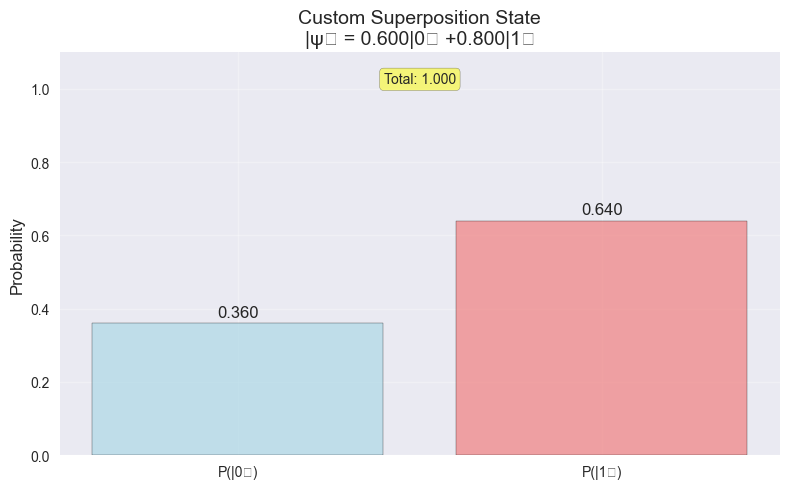

In [8]:
# Example 2: Visualize probabilities for different states
print("📊 Probability Visualizations:")

# Create a custom superposition state
custom_state = QubitState(0.6, 0.8)  # Will be automatically normalized
print(f"Custom state: {custom_state}")

fig, ax = visualizer.plot_probabilities(custom_state, "Custom Superposition State")
plt.show()

🌐 Bloch Sphere Visualization:


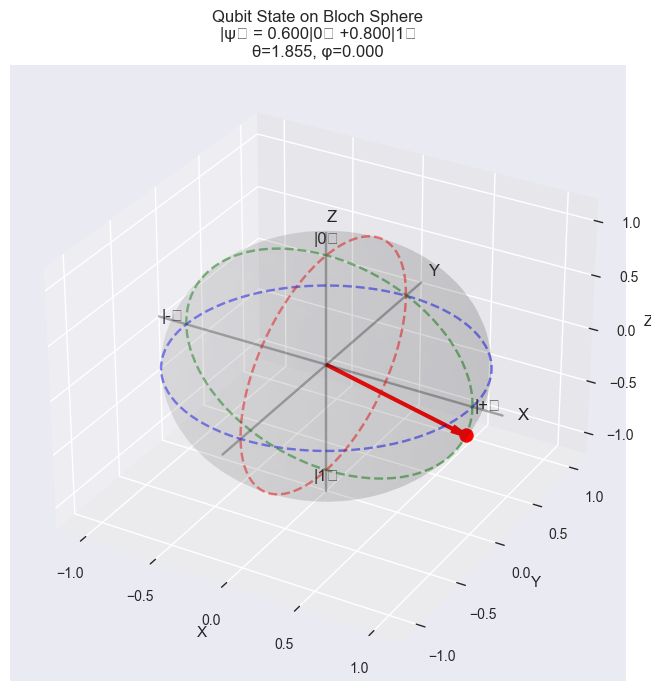

In [9]:
# Example 3: Bloch sphere visualization
print("🌐 Bloch Sphere Visualization:")

# Use custom Bloch sphere visualization
fig, ax = visualizer.plot_bloch_sphere_custom(custom_state)
plt.show()

In [13]:
# Example 4: Quantum gate operations
print("🚪 Quantum Gate Demonstrations:")
print("="*50)

# Start with |0⟩ state
initial_state = QubitState(1, 0)
print(f"Initial state: {initial_state}")

# Apply different gates
gate_demos = [
    ("X (NOT)", gates.pauli_x()),
    ("H (Hadamard)", gates.hadamard()),
    ("Y", gates.pauli_y()),
    ("Z", gates.pauli_z()),
]

for gate_name, gate_matrix in gate_demos:
    result_state = gates.apply_gate(gate_matrix, initial_state)
    print(f"{gate_name:12s}: {initial_state} → {result_state}")
    
    # Show probabilities
    p0, p1 = result_state.probability_0(), result_state.probability_1()
    print(f"             Probabilities: P(0)={p0:.3f}, P(1)={p1:.3f}")
    print()

🚪 Quantum Gate Demonstrations:
Initial state: |ψ⟩ = 1.000|0⟩
X (NOT)     : |ψ⟩ = 1.000|0⟩ → |ψ⟩ = 1.000|1⟩
             Probabilities: P(0)=0.000, P(1)=1.000

H (Hadamard): |ψ⟩ = 1.000|0⟩ → |ψ⟩ = 0.707|0⟩ +0.707|1⟩
             Probabilities: P(0)=0.500, P(1)=0.500

Y           : |ψ⟩ = 1.000|0⟩ → |ψ⟩ = i|1⟩
             Probabilities: P(0)=0.000, P(1)=1.000

Z           : |ψ⟩ = 1.000|0⟩ → |ψ⟩ = 1.000|0⟩
             Probabilities: P(0)=1.000, P(1)=0.000



In [16]:
# Example 5: Inner products and orthogonality
print("🔗 Inner Products and Dirac Notation:")
print("="*50)

state1 = QubitState(1, 0)  # |0⟩
state2 = QubitState(0, 1)  # |1⟩
state3 = QubitState(1/np.sqrt(2), 1/np.sqrt(2))  # |+⟩

print("States:")
print(f"  |ψ₁⟩ = {state1}")
print(f"  |ψ₂⟩ = {state2}")
print(f"  |ψ₃⟩ = {state3}")
print()

print("Vector representations:")
print(f"  |ψ₁⟩ = {state1.ket.flatten()}")
print(f"  |ψ₂⟩ = {state2.ket.flatten()}")
print(f"  |ψ₃⟩ = {state3.ket.flatten()}")
print()

print("Bra vectors (⟨ψ|):")
print(f"  ⟨ψ₁| = {state1.bra}")
print(f"  ⟨ψ₂| = {state2.bra}")
print(f"  ⟨ψ₃| = {state3.bra}")
print()

print("Inner products:")
inner_12 = state1.inner_product(state2)
inner_13 = state1.inner_product(state3)
inner_23 = state2.inner_product(state3)

print(f"  ⟨ψ₁|ψ₂⟩ = {inner_12:.3f}")
print(f"  ⟨ψ₁|ψ₃⟩ = {inner_13:.3f}")
print(f"  ⟨ψ₂|ψ₃⟩ = {inner_23:.3f}")
print()

print("Interpretation:")
print(f"  |⟨ψ₁|ψ₂⟩|² = {abs(inner_12)**2:.3f} (orthogonal states)")
print(f"  |⟨ψ₁|ψ₃⟩|² = {abs(inner_13)**2:.3f} (overlap probability)")
print(f"  |⟨ψ₂|ψ₃⟩|² = {abs(inner_23)**2:.3f} (overlap probability)")

🔗 Inner Products and Dirac Notation:
States:
  |ψ₁⟩ = |ψ⟩ = 1.000|0⟩
  |ψ₂⟩ = |ψ⟩ = 1.000|1⟩
  |ψ₃⟩ = |ψ⟩ = 0.707|0⟩ +0.707|1⟩

Vector representations:
  |ψ₁⟩ = [1.+0.j 0.+0.j]
  |ψ₂⟩ = [0.+0.j 1.+0.j]
  |ψ₃⟩ = [0.70710678+0.j 0.70710678+0.j]

Bra vectors (⟨ψ|):
  ⟨ψ₁| = [[1.-0.j 0.-0.j]]
  ⟨ψ₂| = [[0.-0.j 1.-0.j]]
  ⟨ψ₃| = [[0.70710678-0.j 0.70710678-0.j]]

Inner products:
  ⟨ψ₁|ψ₂⟩ = 0.000+0.000j
  ⟨ψ₁|ψ₃⟩ = 0.707+0.000j
  ⟨ψ₂|ψ₃⟩ = 0.707+0.000j

Interpretation:
  |⟨ψ₁|ψ₂⟩|² = 0.000 (orthogonal states)
  |⟨ψ₁|ψ₃⟩|² = 0.500 (overlap probability)
  |⟨ψ₂|ψ₃⟩|² = 0.500 (overlap probability)


## 2.5. Deep Dive: Dirac Bra-Ket Notation Mastery 📐

Let's master the mathematical language of quantum mechanics step by step.

In [17]:
# Advanced Dirac Notation Examples and Operations
print("📐 ADVANCED DIRAC NOTATION MASTERY")
print("="*50)

# Create various quantum states for demonstration
states = {
    '|0⟩': QubitState(1, 0),
    '|1⟩': QubitState(0, 1),
    '|+⟩': QubitState(1/np.sqrt(2), 1/np.sqrt(2)),
    '|-⟩': QubitState(1/np.sqrt(2), -1/np.sqrt(2)),
    '|i+⟩': QubitState(1/np.sqrt(2), 1j/np.sqrt(2)),
    '|i-⟩': QubitState(1/np.sqrt(2), -1j/np.sqrt(2))
}

print("🔤 1. KET VECTORS |ψ⟩ (Column Vectors)")
for name, state in states.items():
    print(f"   {name:5s} = {state.ket.flatten()} = {state}")

print("\n🔤 2. BRA VECTORS ⟨ψ| (Row Vectors - Complex Conjugate Transpose)")
for name, state in states.items():
    print(f"   ⟨{name[1:-1]}| = {state.bra.flatten()}")

print("\n🔤 3. BRAKET OPERATIONS ⟨φ|ψ⟩ (Inner Products)")
print("   Orthogonality Matrix (⟨φ|ψ⟩ for all pairs):")
print("   " + "       ".join([f"{name:>7s}" for name in states.keys()]))

for name1, state1 in states.items():
    row = f"   {name1:<7s}"
    for name2, state2 in states.items():
        inner_prod = state1.inner_product(state2)
        if abs(inner_prod.imag) < 1e-10:
            row += f"{inner_prod.real:7.3f}"
        else:
            row += f"{inner_prod:.3f}"
    print(row)

print("\n🔤 4. PHYSICAL INTERPRETATION")
print("   • |⟨φ|ψ⟩|² = Probability of measuring state |ψ⟩ when prepared in |φ⟩")
print("   • ⟨φ|ψ⟩ = 0 means states are orthogonal (mutually exclusive)")
print("   • ⟨φ|ψ⟩ = 1 means states are identical")

print("\n🔤 5. COMPLETENESS RELATION")
print("   Identity operator: 𝕀 = |0⟩⟨0| + |1⟩⟨1|")

# Demonstrate completeness relation
I_matrix = np.outer(states['|0⟩'].ket, states['|0⟩'].bra) + np.outer(states['|1⟩'].ket, states['|1⟩'].bra)
print(f"   𝕀 = {I_matrix}")
print(f"   This is the 2×2 identity matrix: {np.allclose(I_matrix, np.eye(2))}")

print("\n🔤 6. PROJECTION OPERATORS")
test_state = states['|+⟩']
proj_0 = np.outer(states['|0⟩'].ket, states['|0⟩'].bra)
proj_1 = np.outer(states['|1⟩'].ket, states['|1⟩'].bra)

proj_0_result = proj_0 @ test_state.ket
proj_1_result = proj_1 @ test_state.ket

print(f"   P₀ = |0⟩⟨0| applied to |+⟩: {proj_0_result.flatten()}")
print(f"   P₁ = |1⟩⟨1| applied to |+⟩: {proj_1_result.flatten()}")
print(f"   Sum: {(proj_0_result + proj_1_result).flatten()} = {test_state.ket.flatten()}")

print("\n✨ Dirac notation provides elegant mathematical framework for quantum mechanics!")

📐 ADVANCED DIRAC NOTATION MASTERY
🔤 1. KET VECTORS |ψ⟩ (Column Vectors)
   |0⟩   = [1.+0.j 0.+0.j] = |ψ⟩ = 1.000|0⟩
   |1⟩   = [0.+0.j 1.+0.j] = |ψ⟩ = 1.000|1⟩
   |+⟩   = [0.70710678+0.j 0.70710678+0.j] = |ψ⟩ = 0.707|0⟩ +0.707|1⟩
   |-⟩   = [ 0.70710678+0.j -0.70710678+0.j] = |ψ⟩ = 0.707|0⟩ -0.707|1⟩
   |i+⟩  = [0.70710678+0.j         0.        +0.70710678j] = |ψ⟩ = 0.707|0⟩ +0.707i|1⟩
   |i-⟩  = [ 0.70710678+0.j         -0.        -0.70710678j] = |ψ⟩ = 0.707|0⟩ +-0.707i|1⟩

🔤 2. BRA VECTORS ⟨ψ| (Row Vectors - Complex Conjugate Transpose)
   ⟨0| = [1.-0.j 0.-0.j]
   ⟨1| = [0.-0.j 1.-0.j]
   ⟨+| = [0.70710678-0.j 0.70710678-0.j]
   ⟨-| = [ 0.70710678-0.j -0.70710678-0.j]
   ⟨i+| = [0.70710678-0.j         0.        -0.70710678j]
   ⟨i-| = [ 0.70710678-0.j         -0.        +0.70710678j]

🔤 3. BRAKET OPERATIONS ⟨φ|ψ⟩ (Inner Products)
   Orthogonality Matrix (⟨φ|ψ⟩ for all pairs):
       |0⟩           |1⟩           |+⟩           |-⟩          |i+⟩          |i-⟩
   |0⟩      1.000  0.000  0.

## 3. Interactive Exploration 🎮

Now it's time to explore! Use the interactive widget below to:
- Adjust θ (polar angle) and φ (azimuthal angle) to create different qubit states
- Apply quantum gates and see how they transform the state
- Observe how the Bloch sphere position and measurement probabilities change

**Instructions:**
1. Use the θ slider to move between |0⟩ (θ=0) and |1⟩ (θ=π)
2. Use the φ slider to add phase relationships
3. Select different gates from the dropdown to see their effects
4. Watch how the probabilities and Bloch sphere position update in real-time!

In [18]:
# Create and display the interactive widget
interactive_widget = visualizer.create_interactive_widget()
display(interactive_widget)

## 4. Exercises and Challenges 🎯

Try these exercises to test your understanding:

### Exercise 1: Creating Specific States
Create qubit states with the following properties:
1. Equal probability of measuring 0 or 1 (like |+⟩)
2. 75% chance of measuring |0⟩, 25% chance of measuring |1⟩
3. A state that points in the negative X direction on the Bloch sphere

### Exercise 2: Gate Sequences
Starting from |0⟩, apply the following gate sequences and predict the final state:
1. H → X → H
2. X → Z → X
3. H → Z → H

### Exercise 3: Measurement Predictions
For the state |ψ⟩ = (1+i)|0⟩ + (1-i)|1⟩:
1. Calculate the normalization constant
2. Find the measurement probabilities
3. Determine the Bloch sphere coordinates

Use the cells below to work through these exercises!

## 3.5. Mastery Check: Qubit Representations Practice 🎓

Before moving to challenges, let's practice converting between different qubit representations.

In [19]:
# Interactive Practice: Converting Between Representations
print("🎓 QUBIT REPRESENTATION CONVERSION PRACTICE")
print("="*60)

def representation_practice():
    """Interactive practice for qubit representation conversions"""
    
    # Practice Problem 1: From Bloch sphere to all other representations
    print("📝 PRACTICE PROBLEM 1: Bloch Sphere → All Representations")
    print("Given: A qubit at Bloch sphere coordinates (θ=π/2, φ=π/2)")
    
    theta_given = np.pi/2
    phi_given = np.pi/2
    
    # Solution
    alpha = np.cos(theta_given/2)
    beta = np.exp(1j * phi_given) * np.sin(theta_given/2)
    practice_state = QubitState(alpha, beta)
    
    print(f"✅ Solution:")
    print(f"   Vector form: |ψ⟩ = {practice_state.ket.flatten()}")
    print(f"   Dirac notation: {practice_state}")
    print(f"   Probabilities: P(0)={practice_state.probability_0():.3f}, P(1)={practice_state.probability_1():.3f}")
    
    x, y, z, _, _ = practice_state.to_bloch_coordinates()
    print(f"   Bloch coordinates: ({x:.3f}, {y:.3f}, {z:.3f})")
    print()
    
    # Practice Problem 2: From Dirac notation to other representations
    print("📝 PRACTICE PROBLEM 2: Dirac Notation → Other Representations")
    print("Given: |ψ⟩ = (1/√3)|0⟩ + (√2/√3)e^(iπ/4)|1⟩")
    
    alpha2 = 1/np.sqrt(3)
    beta2 = np.sqrt(2)/np.sqrt(3) * np.exp(1j * np.pi/4)
    practice_state2 = QubitState(alpha2, beta2)
    
    print(f"✅ Solution:")
    print(f"   Normalized: {practice_state2}")
    print(f"   Vector: {practice_state2.ket.flatten()}")
    print(f"   Probabilities: P(0)={practice_state2.probability_0():.3f}, P(1)={practice_state2.probability_1():.3f}")
    
    x2, y2, z2, theta2, phi2 = practice_state2.to_bloch_coordinates()
    print(f"   Bloch sphere: θ={theta2:.3f}, φ={phi2:.3f}")
    print(f"   Cartesian: ({x2:.3f}, {y2:.3f}, {z2:.3f})")
    print()
    
    # Practice Problem 3: From probability requirements
    print("📝 PRACTICE PROBLEM 3: Probability Requirements → Representations")
    print("Given: Want P(0) = 0.7, P(1) = 0.3, with real amplitudes")
    
    alpha3 = np.sqrt(0.7)
    beta3 = np.sqrt(0.3)
    practice_state3 = QubitState(alpha3, beta3)
    
    print(f"✅ Solution:")
    print(f"   Real amplitudes: α = {alpha3:.3f}, β = {beta3:.3f}")
    print(f"   State: {practice_state3}")
    print(f"   Verification: P(0)={practice_state3.probability_0():.3f}, P(1)={practice_state3.probability_1():.3f}")
    
    x3, y3, z3, theta3, phi3 = practice_state3.to_bloch_coordinates()
    print(f"   Bloch sphere: θ={theta3:.3f}, φ={phi3:.3f}")
    print()
    
    return practice_state, practice_state2, practice_state3

# Run the practice session
states_practiced = representation_practice()

print("🎯 YOUR TURN! Try These Conversion Exercises:")
print("1. Convert (θ=π/4, φ=3π/4) to Dirac notation")
print("2. Find Bloch coordinates for |ψ⟩ = 0.8|0⟩ + 0.6i|1⟩")
print("3. Create a state with P(0)=0.9, P(1)=0.1 and φ=π phase")
print("\n💡 Use the cells below to practice!")

🎓 QUBIT REPRESENTATION CONVERSION PRACTICE
📝 PRACTICE PROBLEM 1: Bloch Sphere → All Representations
Given: A qubit at Bloch sphere coordinates (θ=π/2, φ=π/2)
✅ Solution:
   Vector form: |ψ⟩ = [7.07106781e-01+0.j         4.32978028e-17+0.70710678j]
   Dirac notation: |ψ⟩ = 0.707|0⟩ +0.707i|1⟩
   Probabilities: P(0)=0.500, P(1)=0.500
   Bloch coordinates: (0.000, 1.000, 0.000)

📝 PRACTICE PROBLEM 2: Dirac Notation → Other Representations
Given: |ψ⟩ = (1/√3)|0⟩ + (√2/√3)e^(iπ/4)|1⟩
✅ Solution:
   Normalized: |ψ⟩ = 0.577|0⟩ +0.577+0.577i|1⟩
   Vector: [0.57735027+0.j         0.57735027+0.57735027j]
   Probabilities: P(0)=0.333, P(1)=0.667
   Bloch sphere: θ=1.911, φ=0.785
   Cartesian: (0.667, 0.667, -0.333)

📝 PRACTICE PROBLEM 3: Probability Requirements → Representations
Given: Want P(0) = 0.7, P(1) = 0.3, with real amplitudes
✅ Solution:
   Real amplitudes: α = 0.837, β = 0.548
   State: |ψ⟩ = 0.837|0⟩ +0.548|1⟩
   Verification: P(0)=0.700, P(1)=0.300
   Bloch sphere: θ=1.159, φ=0.000



In [ ]:
# Exercise 1: Creating Specific States
print("🎯 Exercise 1: Creating Specific States")
print("="*50)

# 1. Equal probability state (your code here)
equal_prob_state = None  # Replace with your solution

# 2. 75% |0⟩, 25% |1⟩ state (your code here)
weighted_state = None  # Replace with your solution

# 3. Negative X direction state (your code here)
neg_x_state = None  # Replace with your solution

# Uncomment and run when you have solutions:
# if equal_prob_state:
#     print(f"Equal probability state: {equal_prob_state}")
#     print(f"P(0) = {equal_prob_state.probability_0():.3f}, P(1) = {equal_prob_state.probability_1():.3f}")
# 
# if weighted_state:
#     print(f"Weighted state: {weighted_state}")
#     print(f"P(0) = {weighted_state.probability_0():.3f}, P(1) = {weighted_state.probability_1():.3f}")
# 
# if neg_x_state:
#     print(f"Negative X state: {neg_x_state}")
#     x, y, z, theta, phi = neg_x_state.to_bloch_coordinates()
#     print(f"Bloch coordinates: ({x:.3f}, {y:.3f}, {z:.3f})")

In [ ]:
# Exercise 2: Gate Sequences
print("🎯 Exercise 2: Gate Sequences")
print("="*50)

initial = QubitState(1, 0)  # |0⟩

# 1. H → X → H sequence
seq1_step1 = gates.apply_gate(gates.hadamard(), initial)
seq1_step2 = gates.apply_gate(gates.pauli_x(), seq1_step1)
seq1_final = gates.apply_gate(gates.hadamard(), seq1_step2)

print(f"H → X → H: {initial} → {seq1_step1} → {seq1_step2} → {seq1_final}")

# 2. X → Z → X sequence (your turn to complete)
seq2_step1 = None  # Apply X to initial
seq2_step2 = None  # Apply Z to step1
seq2_final = None  # Apply X to step2

# 3. H → Z → H sequence (your turn to complete)
seq3_step1 = None  # Apply H to initial
seq3_step2 = None  # Apply Z to step1
seq3_final = None  # Apply H to step2

# Uncomment when ready:
# print(f"X → Z → X: {initial} → {seq2_step1} → {seq2_step2} → {seq2_final}")
# print(f"H → Z → H: {initial} → {seq3_step1} → {seq3_step2} → {seq3_final}")

🎯 Exercise 3: Measurement Predictions
Unnormalized state: ((1+1j))|0⟩ + ((1-1j))|1⟩
Normalization constant: 1/2.000
Normalized state: |ψ⟩ = 0.500+0.500i|0⟩ +0.500-0.500i|1⟩
P(|0⟩) = 0.500
P(|1⟩) = 0.500
Total probability: 1.000
Bloch coordinates: (0.000, -1.000, 0.000)
Spherical coordinates: θ=1.571, φ=-1.571


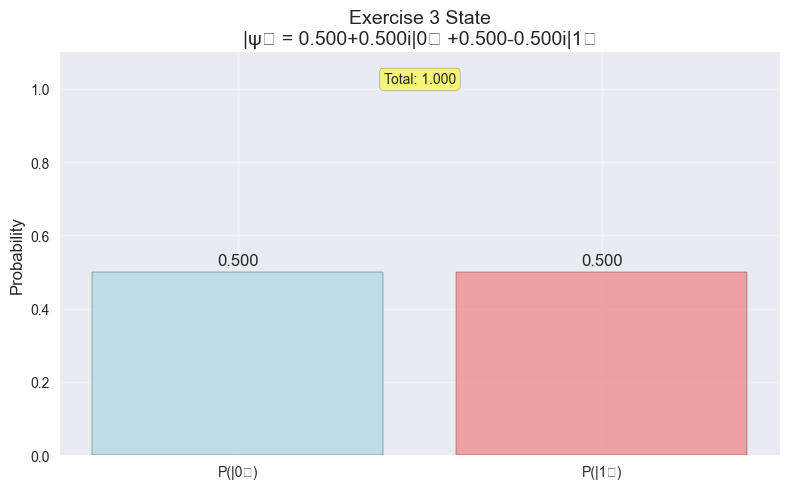

In [20]:
# Exercise 3: Measurement Predictions
print("🎯 Exercise 3: Measurement Predictions")
print("="*50)

# For state |ψ⟩ = (1+i)|0⟩ + (1-i)|1⟩
alpha = 1 + 1j
beta = 1 - 1j

print(f"Unnormalized state: ({alpha})|0⟩ + ({beta})|1⟩")

# 1. Calculate normalization constant
norm_squared = abs(alpha)**2 + abs(beta)**2
norm = np.sqrt(norm_squared)
print(f"Normalization constant: 1/{norm:.3f}")

# 2. Create normalized state
normalized_state = QubitState(alpha, beta)  # Automatically normalizes
print(f"Normalized state: {normalized_state}")

# 3. Find measurement probabilities
p0 = normalized_state.probability_0()
p1 = normalized_state.probability_1()
print(f"P(|0⟩) = {p0:.3f}")
print(f"P(|1⟩) = {p1:.3f}")
print(f"Total probability: {p0 + p1:.3f}")

# 4. Bloch sphere coordinates
x, y, z, theta, phi = normalized_state.to_bloch_coordinates()
print(f"Bloch coordinates: ({x:.3f}, {y:.3f}, {z:.3f})")
print(f"Spherical coordinates: θ={theta:.3f}, φ={phi:.3f}")

# Visualize this state
fig, ax = visualizer.plot_probabilities(normalized_state, "Exercise 3 State")
plt.show()

## 5. Summary and Key Takeaways 📚

Congratulations! You've mastered the four core areas of qubit theory and representation:

### 🎯 CORE TOPICS MASTERED

#### 1. **QUBITS** ✅
- Fundamental quantum information unit
- Superposition principle: |ψ⟩ = α|0⟩ + β|1⟩
- Difference from classical bits (deterministic vs probabilistic)
- Normalization condition: |α|² + |β|² = 1

#### 2. **REPRESENTING QUBIT STATES** ✅
- **Vector Form**: Column vectors in 2D complex space
- **Probability Amplitudes**: α, β with physical interpretation
- **Bloch Sphere**: Geometric representation on unit sphere
- **Density Matrix**: ρ = |ψ⟩⟨ψ| for pure states
- **Spherical Coordinates**: θ, φ parameterization

#### 3. **DIRAC BRA-KET NOTATION** ✅
- **Ket |ψ⟩**: Quantum state (column vector)
- **Bra ⟨ψ|**: Complex conjugate transpose (row vector)  
- **Braket ⟨φ|ψ⟩**: Inner product between states
- **Physical meaning**: Probability amplitudes and orthogonality
- **Mathematical operations**: Projectors, completeness relation

#### 4. **REPRESENTING QUBIT STATES (Advanced)** ✅
- Multiple equivalent representations of same quantum state
- Conversion between representations
- Practical applications in quantum computing
- Visualization techniques and interpretation

### 🌟 Important Insights
- **Measurement Changes Everything**: Quantum measurement collapses superposition
- **Phases Matter**: Global phases don't matter, but relative phases do
- **Orthogonal States**: ⟨0|1⟩ = 0 (computational basis states are orthogonal)
- **Unitarity**: Quantum gates preserve the normalization of states

### 🚀 Next Steps
1. Explore multi-qubit systems and entanglement
2. Learn about quantum algorithms (Deutsch, Grover, Shor)
3. Study quantum error correction
4. Try programming with Qiskit, Cirq, or other quantum frameworks

### 💡 Fun Facts
- The Bloch sphere represents all possible single-qubit states
- Quantum gates are reversible (unitary operations)
- Superposition enables quantum parallelism
- Measurement is the only irreversible operation in quantum mechanics

Keep exploring the quantum world! 🌌✨